In [1]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("star.csv")

In [3]:
all_df[:5]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
all_df.shape

(17898, 9)

In [5]:
X=all_df.drop(['target_class'], axis=1).values.astype('float64')

In [6]:
Y = all_df['target_class'].values.astype('int64')

In [7]:
X.shape

(17898, 8)

In [8]:
X[:5]

array([[ 1.40562500e+02,  5.56837821e+01, -2.34571412e-01,
        -6.99648398e-01,  3.19983278e+00,  1.91104263e+01,
         7.97553179e+00,  7.42422249e+01],
       [ 1.02507812e+02,  5.88824300e+01,  4.65318154e-01,
        -5.15087909e-01,  1.67725752e+00,  1.48601457e+01,
         1.05764867e+01,  1.27393580e+02],
       [ 1.03015625e+02,  3.93416494e+01,  3.23328365e-01,
         1.05116443e+00,  3.12123746e+00,  2.17446687e+01,
         7.73582202e+00,  6.31719091e+01],
       [ 1.36750000e+02,  5.71784487e+01, -6.84146380e-02,
        -6.36238369e-01,  3.64297659e+00,  2.09592803e+01,
         6.89649891e+00,  5.35936607e+01],
       [ 8.87265625e+01,  4.06722254e+01,  6.00866079e-01,
         1.12349169e+00,  1.17892977e+00,  1.14687196e+01,
         1.42695728e+01,  2.52567306e+02]])

In [9]:
Y[:5]

array([0, 0, 0, 0, 0])

In [10]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

14318

In [11]:
train_Features[355:359]

array([[ 0.36112984,  0.31159171, -0.36710959, -0.29321381, -0.3907055 ,
        -0.83537546,  1.90940183,  2.46814431],
       [ 0.60995091,  0.07718099, -0.37038262, -0.28667219, -0.38301725,
        -0.73468559,  1.18487691,  1.134074  ],
       [ 0.52345742, -0.14414577, -0.31964423, -0.28379257, -0.33064638,
        -0.20478093,  0.04580925, -0.27484506],
       [-0.50228232, -0.75427374,  0.01602529, -0.13405655,  0.02403437,
         1.17718143, -1.07679328, -0.89030937]])

In [12]:
train_Label[:4]

array([0, 0, 0, 0])

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [14]:
model = Sequential()

In [15]:
model.add(Dense(units=16*3,   input_dim=8,
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=16*2,   
                kernel_initializer='uniform', 
                activation='relu'))

In [17]:
model.add(Dense(units=16,   
                kernel_initializer='uniform', 
                activation='relu'))

In [18]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 48)                432       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1568      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 2,545
Trainable params: 2,545
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [21]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=300,verbose=1,callbacks=[early_stopping])

Train on 12886 samples, validate on 1432 samples
Epoch 1/30
12886/12886 [==============================] - 2s 119us/step - loss: 0.6690 - acc: 0.9042 - val_loss: 0.6048 - val_acc: 0.9469
Epoch 2/30
12886/12886 [==============================] - 0s 33us/step - loss: 0.3602 - acc: 0.9669 - val_loss: 0.1397 - val_acc: 0.9714
Epoch 3/30
12886/12886 [==============================] - 0s 24us/step - loss: 0.0943 - acc: 0.9765 - val_loss: 0.0903 - val_acc: 0.9728
Epoch 4/30
12886/12886 [==============================] - 1s 40us/step - loss: 0.0795 - acc: 0.9773 - val_loss: 0.0852 - val_acc: 0.9735
Epoch 5/30
12886/12886 [==============================] - 0s 29us/step - loss: 0.0759 - acc: 0.9775 - val_loss: 0.0839 - val_acc: 0.9735
Epoch 6/30
12886/12886 [==============================] - 1s 40us/step - loss: 0.0736 - acc: 0.9783 - val_loss: 0.0812 - val_acc: 0.9721
Epoch 7/30
12886/12886 [==============================] - 1s 43us/step - loss: 0.0724 - acc: 0.9787 - val_loss: 0.0805 - val_acc

In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

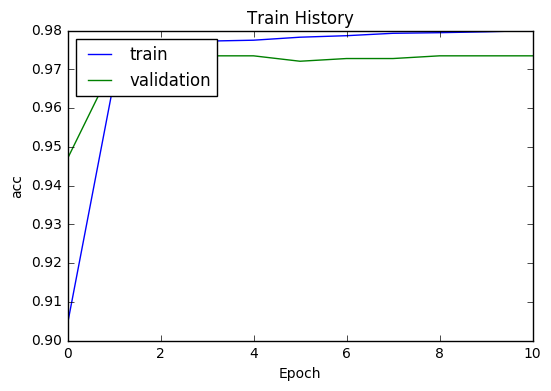

In [23]:
show_train_history(train_history,'acc','val_acc')

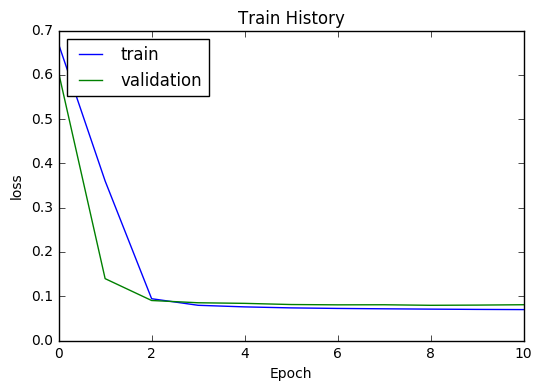

In [24]:
show_train_history(train_history,'loss','val_loss')

In [25]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3580/3580 [==============================] - 0s 87us/step


In [26]:
scores[1]

0.9784916202449265